In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Definiowanie Funkcji Celu

In [90]:
# Definicja funkcji celu
def F1(x):
    return x[0]**2 + x[1]**2

def F2(x):
    return (x[0]-1)**2 + (x[1]+1)**2

def G1(x):
    return x[0]**2 + x[1]**2 + x[2]**2

def G2(x):
    return (x[0]-1)**2 + (x[1]+1)**2 + x[2]**2

def G3(x):
    return x[0]**3 - x[1]**2 + x[2]**2

## Metody Skalaryzacji

In [91]:
# 1. Skalowanie przez funkcję liniową
def linear_scaling(F, lambdas, x):
    return sum(l * f(x) for l, f in zip(lambdas, F))

# 2. Skalowanie metodą ε-ograniczeń
def epsilon_constraints(F, x, epsilons, idx):
    constraints = [{'type': 'ineq', 'fun': lambda x: epsilons[i] - F[i](x)} for i in range(len(F)) if i != idx]
    return minimize(F[idx], x, constraints=constraints)

# 3. Skalowanie przez odległość od punktu dominującego
def distance_scaling(F, x, target, lambdas):
    return np.linalg.norm(np.array([f(x) for f in F]) - target, ord=2)

## Definiowanie Obszaru przeszukiwania

In [92]:
# Definicja obszaru przeszukiwania (dysk jednostkowy w R^2 i R^3)
def is_in_U(x, dim):
    return np.linalg.norm(x) <= 1 if dim == 2 else np.linalg.norm(x) <= np.sqrt(2)

## Optymalizacja dla ploblemu 2 i 3-kryterialnego

In [93]:
# Aproksymacja zbiorów Pareto dla dwóch problemów
def pareto_approximation_2d(F, method, lambdas, steps):
    points = []
    for i in np.linspace(0, 1, steps):
        x0 = np.random.rand(2) * 2 - 1
        if is_in_U(x0, 2):
            if method == 'linear':
                res = minimize(lambda x: linear_scaling(F, [i, 1 - i], x), x0)
            elif method == 'epsilon':
                res = epsilon_constraints(F, x0, [1, 1], 0)
            elif method == 'distance':
                res = minimize(lambda x: distance_scaling(F, x, [0, 0], [i, 1 - i]), x0)
            if res.success:
                points.append([F[0](res.x), F[1](res.x)])
    return np.array(points)

def pareto_approximation_3d(G, method, lambdas, steps):
    points = []
    for i in np.linspace(0, 1, steps):
        x0 = np.random.rand(3) * 2 - 1
        if is_in_U(x0, 3):
            if method == 'linear':
                res = minimize(lambda x: linear_scaling(G, [i, 1 - i, i/2], x), x0)
            elif method == 'epsilon':
                res = epsilon_constraints(G, x0, [1, 1, 1], 0)
            elif method == 'distance':
                res = minimize(lambda x: distance_scaling(G, x, [0, 0, 0], [i, 1 - i, i/2]), x0)
            if res.success:
                points.append([G[0](res.x), G[1](res.x), G[2](res.x)])
    return np.array(points)

## Funkcje Wizualizacji 

In [94]:
# Wizualizacja wyników
def plot_pareto_2d(points, title):
    plt.scatter(points[:, 0], points[:, 1])
    plt.title(title)
    plt.xlabel("F1")
    plt.ylabel("F2")
    plt.grid()
    plt.show()

def plot_pareto_3d(points, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    ax.set_title(title)
    ax.set_xlabel("G1")
    ax.set_ylabel("G2")
    ax.set_zlabel("G3")
    plt.show()

## Wywołanie

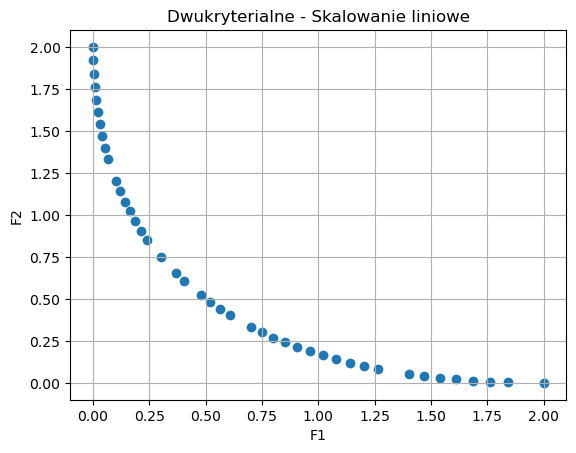

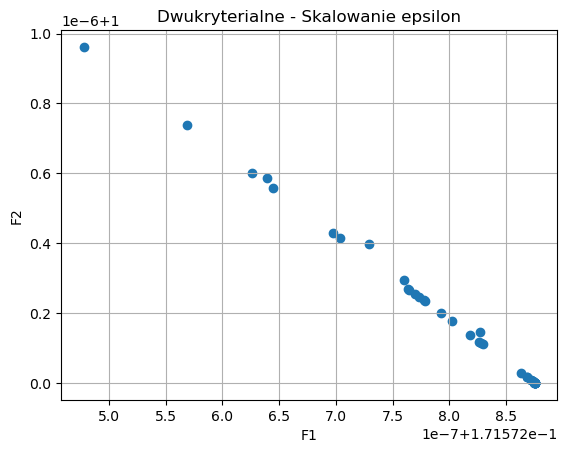

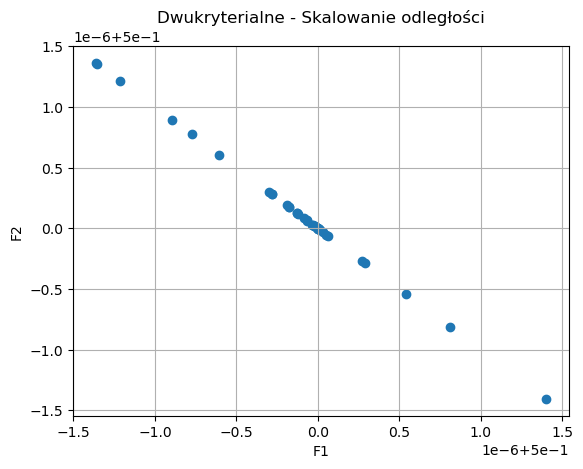

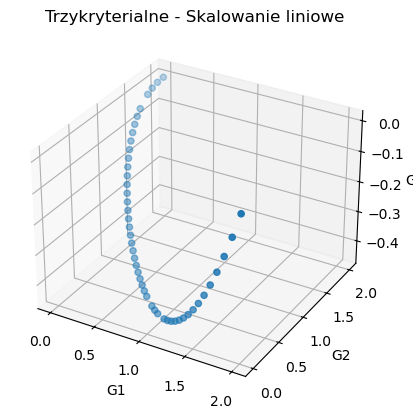

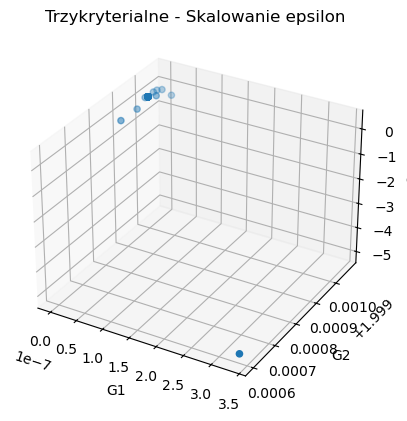

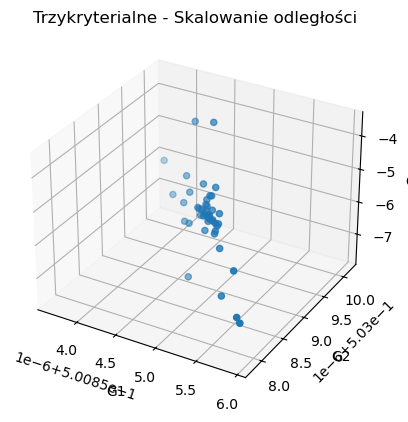

In [95]:
# Wywołanie dla dwukryterialnego problemu
F = [F1, F2]
points_linear = pareto_approximation_2d(F, 'linear', [0.5, 0.5], 50)
points_epsilon = pareto_approximation_2d(F, 'epsilon', [0.5, 0.5], 50)
points_distance = pareto_approximation_2d(F, 'distance', [0.5, 0.5], 50)

plot_pareto_2d(points_linear, "Dwukryterialne - Skalowanie liniowe")
plot_pareto_2d(points_epsilon, "Dwukryterialne - Skalowanie epsilon")
plot_pareto_2d(points_distance, "Dwukryterialne - Skalowanie odległości")

# Wywołanie dla trzykryterialnego problemu
G = [G1, G2, G3]
points_linear_3d = pareto_approximation_3d(G, 'linear', [0.5, 0.5, 0.5], 50)
points_epsilon_3d = pareto_approximation_3d(G, 'epsilon', [0.5, 0.5, 0.5], 50)
points_distance_3d = pareto_approximation_3d(G, 'distance', [0.5, 0.5, 0.5], 50)

plot_pareto_3d(points_linear_3d, "Trzykryterialne - Skalowanie liniowe")
plot_pareto_3d(points_epsilon_3d, "Trzykryterialne - Skalowanie epsilon")
plot_pareto_3d(points_distance_3d, "Trzykryterialne - Skalowanie odległości")